In [1]:
'''SELECT TOP 50000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount
FROM Posts 
WHERE PostTypeId = 1 AND ViewCount > 10 AND FavoriteCount > 10 AND AnswerCount > 0
AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5'''

"SELECT TOP 50000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount\nFROM Posts \nWHERE PostTypeId = 1 AND ViewCount > 10 AND FavoriteCount > 10 AND AnswerCount > 0\nAND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5"

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'/Users/stanislasbocearov/Downloads/QueryResults_2.csv')

# Exploration

In [3]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,ggplot: arranging boxplots of multiple y-varia...,<p>I would like to create boxplots of multiple...,<r><ggplot2><boxplot><continuous><r-factor>,21388845,18,49066,13,1
1,How do I get the path of a process in Unix / L...,<p>In Windows environment there is an API to o...,<linux><unix><process><path><environment>,606041,155,234389,58,11
2,How to detect using c# if a pendrive is plugge...,<p>Is there a way to find out when in a LAN an...,<c#><windows><usb><monitoring><usb-flash-drive>,271907,13,22142,15,4
3,How to set up unit testing for Visual Studio C++,<p>I'm having trouble figuring out how to get ...,<c++><unit-testing><testing><visual-studio-200...,3150,94,61403,43,12
4,Absolute path back to web-relative path,<p>If I have managed to locate and verify the ...,<c#><asp.net><.net><path><mappath>,3164,66,58717,20,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27588 entries, 0 to 27587
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27588 non-null  object
 1   Body           27588 non-null  object
 2   Tags           27588 non-null  object
 3   Id             27588 non-null  int64 
 4   Score          27588 non-null  int64 
 5   ViewCount      27588 non-null  int64 
 6   FavoriteCount  27588 non-null  int64 
 7   AnswerCount    27588 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [6]:
#there is no duplicated values for the id column
df[df['Id'].duplicated()]

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount


(0.0, 250.0)

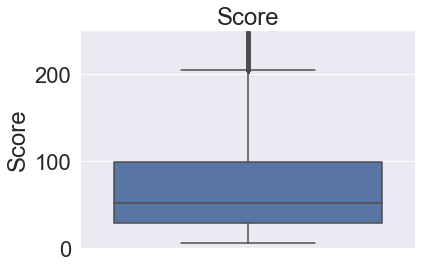

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
sns.boxplot(y=df['Score'])
plt.title("Score")
plt.ylim([0,250])

Text(0, 0.5, 'Number of scores with this value')

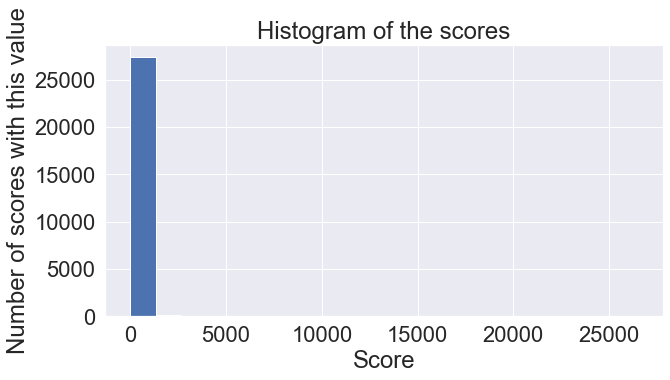

In [8]:
df['Score'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the scores")
plt.xlabel("Score")
plt.ylabel("Number of scores with this value")

Text(0, 0.5, 'Number of scores with this value')

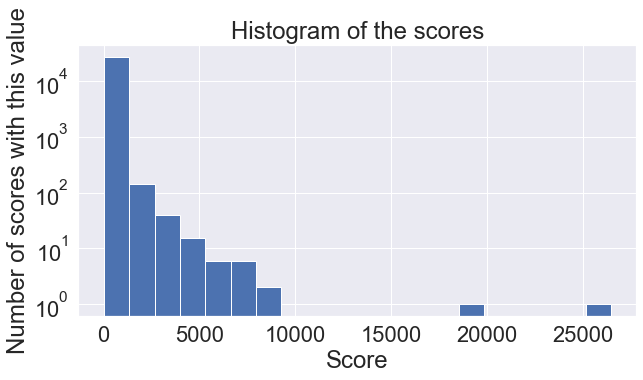

In [9]:
df["Score"].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the scores")
plt.yscale('log')
plt.xlabel("Score")
plt.ylabel("Number of scores with this value")

(0.0, 300000.0)

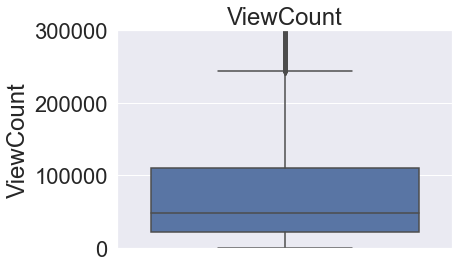

In [10]:
sns.boxplot(y=df['ViewCount'])
plt.title("ViewCount")
plt.ylim([0,300000])

Text(0, 0.5, 'Number of ViewCount with this value')

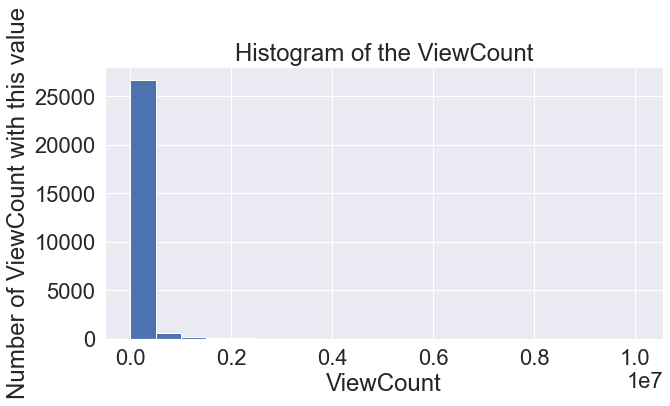

In [11]:
df['ViewCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the ViewCount")
plt.xlabel("ViewCount")
plt.ylabel("Number of ViewCount with this value")

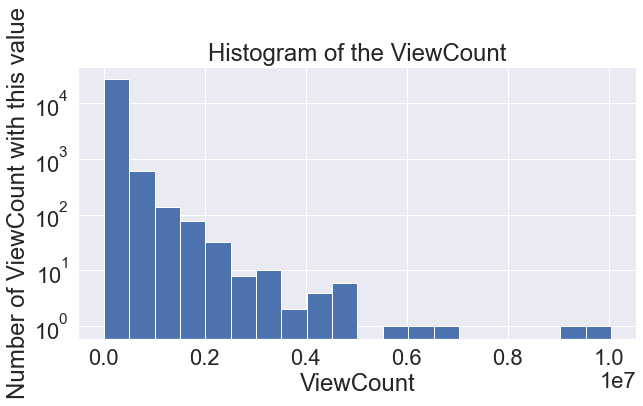

In [12]:
df["ViewCount"].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the ViewCount")
plt.xlabel("ViewCount")
plt.ylabel("Number of ViewCount with this value")
plt.yscale('log')

(0.0, 100.0)

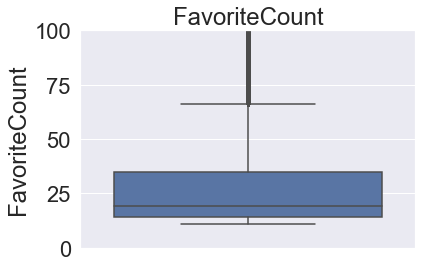

In [13]:
sns.boxplot(y=df['FavoriteCount'])
plt.title("FavoriteCount")
plt.ylim([0,100])

Text(0, 0.5, 'Number of FavoriteCount with this value')

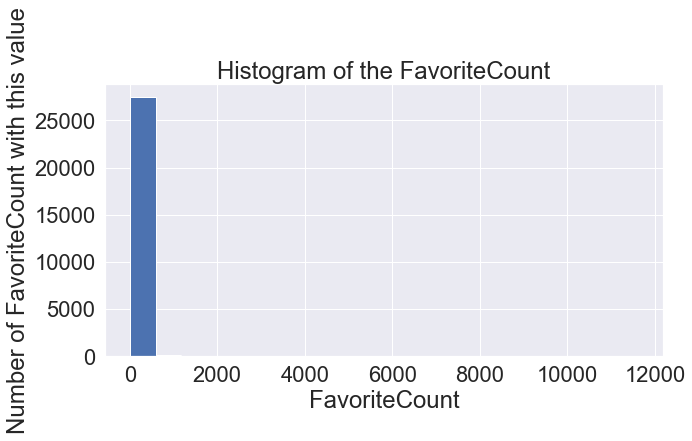

In [14]:
df['FavoriteCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the FavoriteCount")
plt.xlabel("FavoriteCount")
plt.ylabel("Number of FavoriteCount with this value")

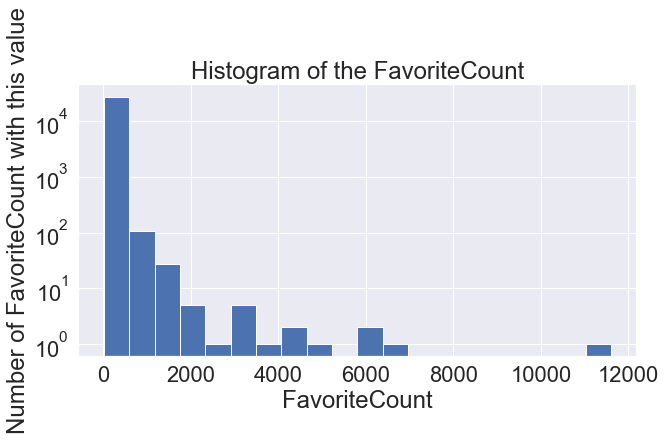

In [15]:
df['FavoriteCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the FavoriteCount")
plt.xlabel("FavoriteCount")
plt.ylabel("Number of FavoriteCount with this value")
plt.yscale('log')

(0.0, 25.0)

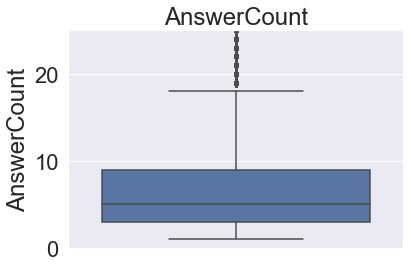

In [16]:
sns.boxplot(y=df['AnswerCount'])
plt.title("AnswerCount")
plt.ylim([0,25])

Text(0, 0.5, 'Number of AnswerCount with this value')

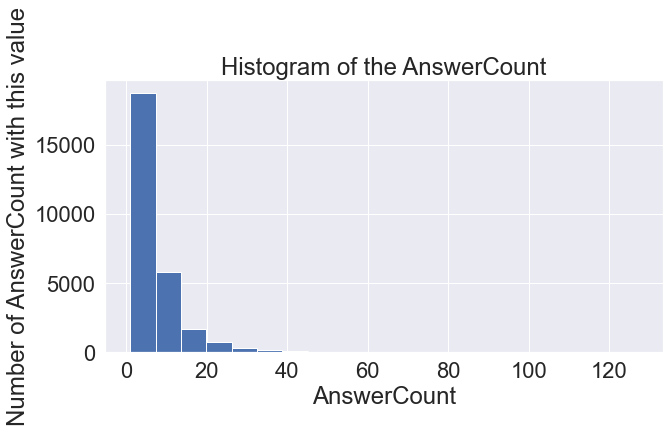

In [17]:
df['AnswerCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the AnswerCount")
plt.xlabel("AnswerCount")
plt.ylabel("Number of AnswerCount with this value")

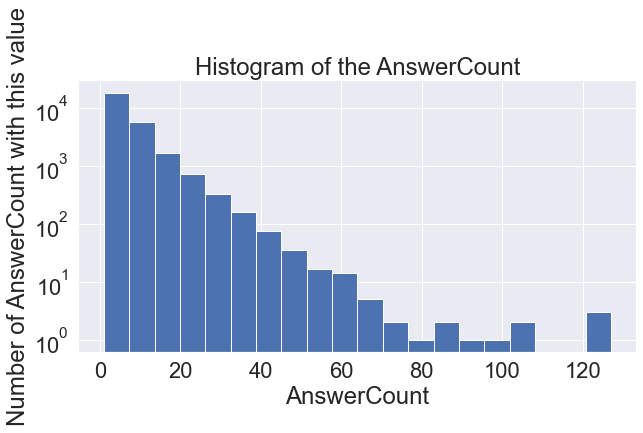

In [18]:
df['AnswerCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the AnswerCount")
plt.xlabel("AnswerCount")
plt.ylabel("Number of AnswerCount with this value")
plt.yscale('log')

# Cleaning

In [19]:
import re

In [20]:
re.findall('<(.*?)>', '<java><spring><jpa><spring-data><spring-data-jpa>')

['java', 'spring', 'jpa', 'spring-data', 'spring-data-jpa']

In [21]:
from tqdm import tqdm

In [22]:
tqdm.pandas()

In [23]:
tags = df['Tags'].progress_apply(lambda x: re.findall('<(.*?)>', x))

100%|█████████████████████████████████| 27588/27588 [00:00<00:00, 105703.21it/s]


In [24]:
tags

0              [r, ggplot2, boxplot, continuous, r-factor]
1                [linux, unix, process, path, environment]
2          [c#, windows, usb, monitoring, usb-flash-drive]
3        [c++, unit-testing, testing, visual-studio-200...
4                       [c#, asp.net, .net, path, mappath]
                               ...                        
27583         [linux, centos, vagrant, virtualbox, redhat]
27584    [python, macos, terminal, atom-editor, macos-m...
27585    [c++, pointers, language-lawyer, void-pointers...
27586    [assembly, optimization, x86-64, cpu-architect...
27587    [python, string, reference, immutability, stri...
Name: Tags, Length: 27588, dtype: object

In [25]:
tags_dataframe = df['Tags'].progress_apply(lambda x: re.findall('<(.*?)>', x)).progress_apply(pd.Series)

100%|███████████████████████████████████| 27588/27588 [00:06<00:00, 4439.57it/s]


In [26]:
tags_dataframe

,0,1,2,3,4
0,r,ggplot2,boxplot,continuous,r-factor
1,linux,unix,process,path,environment
2,c#,windows,usb,monitoring,usb-flash-drive
3,c++,unit-testing,testing,visual-studio-2008,frameworks
4,c#,asp.net,.net,path,mappath
...,...,...,...,...,...
27583,linux,centos,vagrant,virtualbox,redhat
27584,python,macos,terminal,atom-editor,macos-monterey
27585,c++,pointers,language-lawyer,void-pointers,pointer-conversion
27586,assembly,optimization,x86-64,cpu-architecture,simd


In [27]:
tags_dataframe.value_counts()

0               1             2                 3                 4                        
java            spring        jpa               spring-data       spring-data-jpa              19
python          apache-spark  dataframe         pyspark           apache-spark-sql             16
javascript      jquery        html              css               twitter-bootstrap            12
python          image         opencv            image-processing  computer-vision               9
                tensorflow    machine-learning  keras             deep-learning                 8
                                                                                               ..
google-chrome   firefox       browser           video-streaming   media-source                  1
                download      executable        signing           authenticode                  1
                debugging     developer-tools   xdotool           firefox-developer-edition     1
                curl      

In [28]:
tags = tags_dataframe.stack()

In [29]:
tags

0      0                       r
       1                 ggplot2
       2                 boxplot
       3              continuous
       4                r-factor
                    ...         
27587  0                  python
       1                  string
       2               reference
       3            immutability
       4    string-concatenation
Length: 137940, dtype: object

In [30]:
tags.value_counts()

python                3129
java                  3094
javascript            2739
c#                    2673
ios                   2410
                      ... 
graphic-effects          1
chromebook               1
google-chrome-os         1
protected-resource       1
pointer-conversion       1
Length: 12530, dtype: int64

In [31]:
pd.set_option("display.max_colwidth", None)
df['Body'].sample(1)

15779    <p>What is the best way to server <code>sitemap.xml</code> and <code>robots.txt</code> with <code>Spring MVC</code>? I want server these files through <code>Controller</code> in cleanest way. </p>\n
Name: Body, dtype: object

In [32]:
from bs4 import BeautifulSoup
df['Body'][0]

'<p>I would like to create boxplots of multiple variables for groups of a continuous x-variable. The boxplots should be arranged next to each other for each group of x.</p>\n\n<p>The data looks like this:</p>\n\n<pre><code>require (ggplot2)\nrequire (plyr)\nlibrary(reshape2)\n\nset.seed(1234)\nx   &lt;- rnorm(100)\ny.1 &lt;- rnorm(100)\ny.2 &lt;- rnorm(100)\ny.3 &lt;- rnorm(100)\ny.4 &lt;- rnorm(100)\n\ndf &lt;- as.data.frame(cbind(x,y.1,y.2,y.3,y.4))\n</code></pre>\n\n<p>which I then melted</p>\n\n<pre><code>dfmelt &lt;- melt(df, measure.vars=2:5)    \n</code></pre>\n\n<p>The facet_wrap as shown in this solution (\n<a href="https://stackoverflow.com/questions/10987193/multiple-plots-by-factor-in-ggplot-facets">Multiple plots by factor in ggplot (facets)</a>)\ngives me out each variable in an individual plot, but I would like to have the boxplots of each variable next to each other for each bin of x in one diagram.</p>\n\n<pre><code>ggplot(dfmelt, aes(value, x, group = round_any(x, 0.5

In [33]:
df['Body'] = df[['Body']].applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())

In [34]:
df['Body'][0]

'I would like to create boxplots of multiple variables for groups of a continuous x-variable. The boxplots should be arranged next to each other for each group of x.\nThe data looks like this:\nrequire (ggplot2)\nrequire (plyr)\nlibrary(reshape2)\n\nset.seed(1234)\nx   <- rnorm(100)\ny.1 <- rnorm(100)\ny.2 <- rnorm(100)\ny.3 <- rnorm(100)\ny.4 <- rnorm(100)\n\ndf <- as.data.frame(cbind(x,y.1,y.2,y.3,y.4))\n\nwhich I then melted\ndfmelt <- melt(df, measure.vars=2:5)    \n\nThe facet_wrap as shown in this solution (\nMultiple plots by factor in ggplot (facets))\ngives me out each variable in an individual plot, but I would like to have the boxplots of each variable next to each other for each bin of x in one diagram.\nggplot(dfmelt, aes(value, x, group = round_any(x, 0.5), fill=variable))+\ngeom_boxplot() + \ngeom_jitter() + \nfacet_wrap(~variable)\n\n\nThis shows the y-variables next to each other but does not bin x.\nggplot(dfmelt) +\ngeom_boxplot(aes(x=x,y=value,fill=variable))+\nface

In [35]:
import spacy
import nltk

In [36]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
punkt_mod = "".join([i for i in string.punctuation if i not in ['#', '+']])

In [38]:
punkt_mod

'!"$%&\'()*,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in punkt_mod])
    return punctuationfree

In [40]:
df['no_punctuation_title'] = df['Title'].apply(lambda x:remove_punctuation(x))

In [41]:
df['no_punctuation_title']

0                                           ggplot arranging boxplots of multiple yvariables for each group of a continuous x
1                                                                           How do I get the path of a process in Unix  Linux
2                                                             How to detect using c# if a pendrive is plugged into a USB port
3                                                                            How to set up unit testing for Visual Studio C++
4                                                                                      Absolute path back to webrelative path
                                                                 ...                                                         
27583                                                                              CentOS through a VM  no URLs in mirrorlist
27584    How can I fix the zsh command not found python error macOS Monterey 123 Pythonnbsp310 Atom IDE and atompython

In [42]:
#text to lower cases
df['title_lower'] = df['no_punctuation_title'].apply(lambda x: x.lower())

In [43]:
#tokenizing the column title
df['tokenized_title'] = df['title_lower'].apply(lambda x: nltk.word_tokenize(x))

In [44]:
#to remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [45]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [46]:
df['no_stopwords_title'] = df['tokenized_title'].apply(lambda x:remove_stopwords(x))

In [47]:
#Stemming to compare with Lemmatization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


In [48]:
def stemming(text):
    stem_text = [stemmer.stem(word) for word in text] # Stem every word.
    return stem_text

In [49]:
df['title_stemmed'] = df['no_stopwords_title'].apply(lambda x:stemming(x))

In [50]:
df['title_stemmed']

0                                                     [ggplot, arrang, boxplot, multipl, yvariabl, group, continu, x]
1                                                                                   [get, path, process, unix, linux]
2                                                                       [detect, use, c, #, pendriv, plug, usb, port]
3                                                                              [set, unit, test, visual, studio, c++]
4                                                                                 [absolut, path, back, webrel, path]
                                                             ...                                                     
27583                                                                                    [cento, vm, url, mirrorlist]
27584    [fix, zsh, command, found, python, error, maco, monterey, 123, pythonnbsp310, atom, ide, atompythonrun, 097]
27585                                                   

In [55]:
joining_stemmed = df['title_stemmed'].apply(lambda x: " ".join(x)) 

In [56]:
joining_stemmed

0                                               ggplot arrang boxplot multipl yvariabl group continu x
1                                                                          get path process unix linux
2                                                                 detect use c # pendriv plug usb port
3                                                                      set unit test visual studio c++
4                                                                        absolut path back webrel path
                                                     ...                                              
27583                                                                          cento vm url mirrorlist
27584    fix zsh command found python error maco monterey 123 pythonnbsp310 atom ide atompythonrun 097
27585                                                                                 pointer size c++
27586                                         code execut slowli strength

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_stemmed = tfidf.fit_transform(joining_stemmed)

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 21min 8s, sys: 2min 20s, total: 23min 28s
Wall time: 3min 27s


<AxesSubplot:>

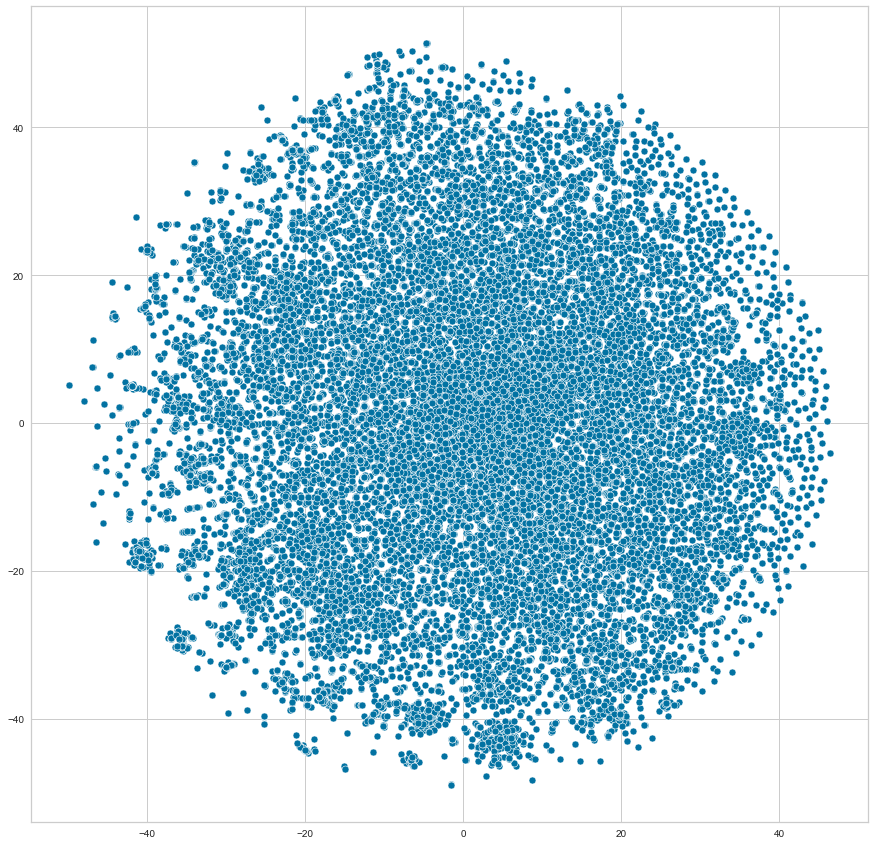

In [60]:
from sklearn.manifold import TSNE
%time x_embedded = TSNE(n_components=2, init='random').fit_transform(X_stemmed)
plt.figure(figsize=(15, 15))
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:, 1],
                palette=sns.color_palette("hls", 3))

In [63]:
#Doing Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [64]:
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [65]:
df['title_lemmatized'] = df['no_stopwords_title'].apply(lambda x:lemmatizer(x))

In [67]:
joining_lemm = df['title_lemmatized'].apply(lambda x: " ".join(x))
X_lemm = tfidf.fit_transform(joining_lemm)

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 18min 49s, sys: 2min 14s, total: 21min 3s
Wall time: 3min 1s


<AxesSubplot:>

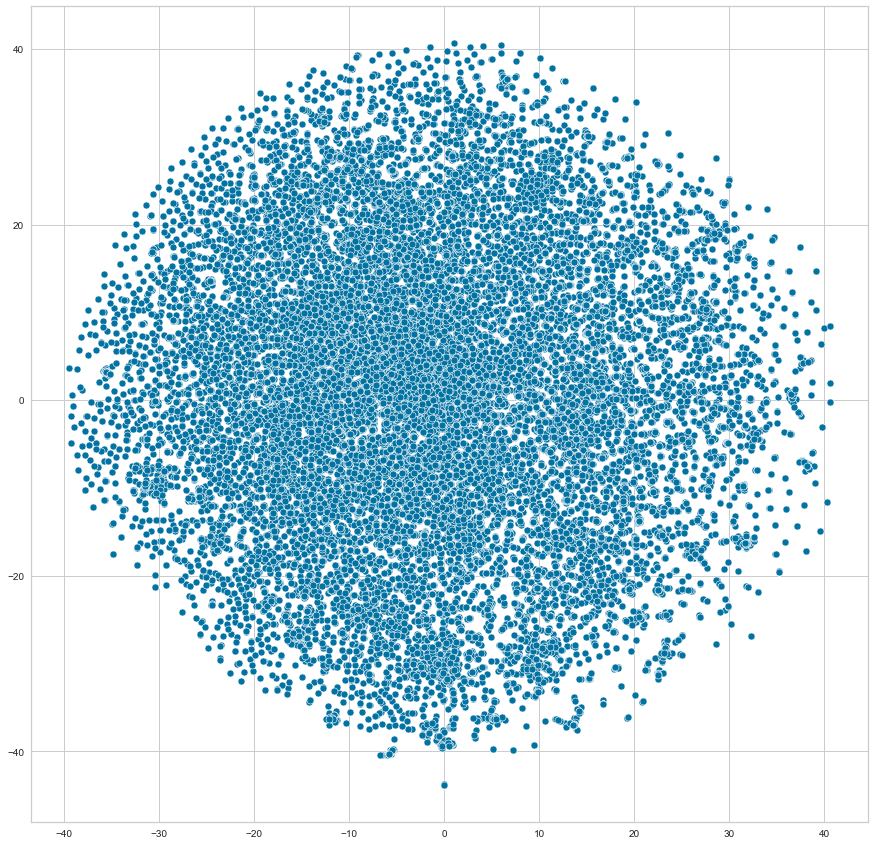

In [68]:
%time x_embedded = TSNE(n_components=2, init='random').fit_transform(X_lemm)
plt.figure(figsize=(15, 15))
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:, 1],
                palette=sns.color_palette("hls", 3))

In [69]:
#Cleaning the body column
df['no_punctuation_body'] = df['Body'].apply(lambda x:remove_punctuation(x))

In [70]:
df['body_lower'] = df['no_punctuation_body'].apply(lambda x: x.lower())

In [71]:
df['tokenized_body'] = df['body_lower'].apply(lambda x: nltk.word_tokenize(x))

In [72]:
df['no_stopwords_body'] = df['tokenized_body'].apply(lambda x:remove_stopwords(x))

In [73]:
df['body_lemmatized'] = df['no_stopwords_body'].apply(lambda x:lemmatizer(x))

In [74]:
df[:2]

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,no_punctuation_title,title_lower,tokenized_title,no_stopwords_title,title_stemmed,title_lemmatized,no_punctuation_body,body_lower,tokenized_body,no_stopwords_body,body_lemmatized
0,ggplot: arranging boxplots of multiple y-variables for each group of a continuous x,"I would like to create boxplots of multiple variables for groups of a continuous x-variable. The boxplots should be arranged next to each other for each group of x.\nThe data looks like this:\nrequire (ggplot2)\nrequire (plyr)\nlibrary(reshape2)\n\nset.seed(1234)\nx <- rnorm(100)\ny.1 <- rnorm(100)\ny.2 <- rnorm(100)\ny.3 <- rnorm(100)\ny.4 <- rnorm(100)\n\ndf <- as.data.frame(cbind(x,y.1,y.2,y.3,y.4))\n\nwhich I then melted\ndfmelt <- melt(df, measure.vars=2:5) \n\nThe facet_wrap as shown in this solution (\nMultiple plots by factor in ggplot (facets))\ngives me out each variable in an individual plot, but I would like to have the boxplots of each variable next to each other for each bin of x in one diagram.\nggplot(dfmelt, aes(value, x, group = round_any(x, 0.5), fill=variable))+\ngeom_boxplot() + \ngeom_jitter() + \nfacet_wrap(~variable)\n\n\nThis shows the y-variables next to each other but does not bin x.\nggplot(dfmelt) +\ngeom_boxplot(aes(x=x,y=value,fill=variable))+\nfacet_grid(~variable)\n\n\nNow I would like to produce such a plot for each bin of x.\nWhat has to be changed or added?\n",<r><ggplot2><boxplot><continuous><r-factor>,21388845,18,49066,13,1,ggplot arranging boxplots of multiple yvariables for each group of a continuous x,ggplot arranging boxplots of multiple yvariables for each group of a continuous x,"[ggplot, arranging, boxplots, of, multiple, yvariables, for, each, group, of, a, continuous, x]","[ggplot, arranging, boxplots, multiple, yvariables, group, continuous, x]","[ggplot, arrang, boxplot, multipl, yvariabl, group, continu, x]","[ggplot, arranging, boxplots, multiple, yvariables, group, continuous, x]",I would like to create boxplots of multiple variables for groups of a continuous xvariable The boxplots should be arranged next to each other for each group of x\nThe data looks like this\nrequire ggplot2\nrequire plyr\nlibraryreshape2\n\nsetseed1234\nx rnorm100\ny1 rnorm100\ny2 rnorm100\ny3 rnorm100\ny4 rnorm100\n\ndf asdataframecbindxy1y2y3y4\n\nwhich I then melted\ndfmelt meltdf measurevars25 \n\nThe facetwrap as shown in this solution \nMultiple plots by factor in ggplot facets\ngives me out each variable in an individual plot but I would like to have the boxplots of each variable next to each other for each bin of x in one diagram\nggplotdfmelt aesvalue x group roundanyx 05 fillvariable+\ngeomboxplot + \ngeomjitter + \nfacetwrapvariable\n\n\nThis shows the yvariables next to each other but does not bin x\nggplotdfmelt +\ngeomboxplotaesxxyvaluefillvariable+\nfacetgridvariable\n\n\nNow I would like to produce such a plot for each bin of x\nWhat has to be changed or added\n,i would like to create boxplots of multiple variables for groups of a continuous xvariable the boxplots should be arranged next to each other for each group of x\nthe data looks like this\nrequire ggplot2\nrequire plyr\nlibraryreshape2\n\nsetseed1234\nx rnorm100\ny1 rnorm100\ny2 rnorm100\ny3 rnorm100\ny4 rnorm100\n\ndf asdataframecbindxy1y2y3y4\n\nwhich i then melted\ndfmelt meltdf measurevars25 \n\nthe facetwrap as shown in this solution \nmultiple plots by factor in ggplot facets\ngives me out each variable in an individual plot but i would like to have the boxplots of each variable next to each other for each bin of x in one diagram\nggplotdfmelt aesvalue x group roundanyx 05 fillvariable+\ngeomboxplot + \ngeomjitter + \nfacetwrapvariable\n\n\nthis shows the yvariables next to each other but does not bin x\nggplotdfmelt +\ngeomboxplotaesxxyvaluefillvariable+\nfacetgridvariable\n\n\nnow i would like to produce such a plot for each bin of x\nwhat has to be changed or added\n,"[i, would, like, to, create, 

In [75]:
x_cleaned = df['body_lemmatized'] + df['title_lemmatized']

In [76]:
x_cleaned[:2]

0    [would, like, create, boxplots, multiple, variable, group, continuous, xvariable, boxplots, arranged, next, group, x, data, look, like, require, ggplot2, require, plyr, libraryreshape2, setseed1234, x, rnorm100, y1, rnorm100, y2, rnorm100, y3, rnorm100, y4, rnorm100, df, asdataframecbindxy1y2y3y4, melted, dfmelt, meltdf, measurevars25, facetwrap, shown, solution, multiple, plot, factor, ggplot, facet, give, variable, individual, plot, would, like, boxplots, variable, next, bin, x, one, diagram, ggplotdfmelt, aesvalue, x, group, roundanyx, 05, fillvariable+, geomboxplot, +, geomjitter, +, facetwrapvariable, show, yvariables, next, bin, x, ggplotdfmelt, +, geomboxplotaesxxyvaluefillvariable+, facetgridvariable, would, like, produce, plot, bin, x, changed, added, ggplot, arranging, boxplots, multiple, yvariables, group, continuous, x]
1                                                                                                                                                      

In [77]:
x_cleaned.shape

(27588,)

In [78]:
x_str = x_cleaned.apply(lambda x: " ".join(x)) 

In [79]:
x_str[:2]

0    would like create boxplots multiple variable group continuous xvariable boxplots arranged next group x data look like require ggplot2 require plyr libraryreshape2 setseed1234 x rnorm100 y1 rnorm100 y2 rnorm100 y3 rnorm100 y4 rnorm100 df asdataframecbindxy1y2y3y4 melted dfmelt meltdf measurevars25 facetwrap shown solution multiple plot factor ggplot facet give variable individual plot would like boxplots variable next bin x one diagram ggplotdfmelt aesvalue x group roundanyx 05 fillvariable+ geomboxplot + geomjitter + facetwrapvariable show yvariables next bin x ggplotdfmelt + geomboxplotaesxxyvaluefillvariable+ facetgridvariable would like produce plot bin x changed added ggplot arranging boxplots multiple yvariables group continuous x
1                                                                                                                                                                                                                                                        

In [80]:
df

Title  \
0                                                         ggplot: arranging boxplots of multiple y-variables for each group of a continuous x   
1                                                                                          How do I get the path of a process in Unix / Linux   
2                                                                            How to detect using c# if a pendrive is plugged into a USB port?   
3                                                                                            How to set up unit testing for Visual Studio C++   
4                                                                                                     Absolute path back to web-relative path   
...                                                                                                                                       ...   
27583                                                                                             CentOS through a VM - no URLs in mirrorlist   
27584  How can I fix the "zsh: command not found: python" error? (macOS Monterey 12.3, Python&nbsp;3.10, Atom IDE, and atom-python-run 0.9.7)   
27585                                                                                              Do all pointers have the same size in C++?   
27586                               Why does this code execute more slowly after strength-reducing multiplications to loop-carried additions?   
27587                                              If Python strings are immutable, why does it keep the same id if I use += to append to it?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [81]:
df = df.reset_index(drop=True)

In [82]:
df

Title  \
0                                                         ggplot: arranging boxplots of multiple y-variables for each group of a continuous x   
1                                                                                          How do I get the path of a process in Unix / Linux   
2                                                                            How to detect using c# if a pendrive is plugged into a USB port?   
3                                                                                            How to set up unit testing for Visual Studio C++   
4                                                                                                     Absolute path back to web-relative path   
...                                                                                                                                       ...   
27583                                                                                             CentOS through a VM - no URLs in mirrorlist   
27584  How can I fix the "zsh: command not found: python" error? (macOS Monterey 12.3, Python&nbsp;3.10, Atom IDE, and atom-python-run 0.9.7)   
27585                                                                                              Do all pointers have the same size in C++?   
27586                               Why does this code execute more slowly after strength-reducing multiplications to loop-carried additions?   
27587                                              If Python strings are immutable, why does it keep the same id if I use += to append to it?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x_str)

In [84]:
import joblib

In [85]:
joblib.dump(vectorizer, "nlp_stackoverflow/vectorizer.pkl")

['nlp_stackoverflow/vectorizer.pkl']

In [86]:
X.shape

(27588, 266615)

In [87]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
x_reduced = svd.fit_transform(X)

In [88]:
joblib.dump(svd, "nlp_stackoverflow/svd.pkl")

['nlp_stackoverflow/svd.pkl']

In [89]:
x_reduced.shape

(27588, 100)

In [90]:
print(f"The explained variance ratio is {svd.explained_variance_ratio_}")
print(f"The explance variance ratio sum is {svd.explained_variance_ratio_.sum()}")
print(f"The singular values are {svd.singular_values_}")

The explained variance ratio is [0.00203906 0.00411186 0.00338707 0.00311263 0.00284617 0.00266949
 0.00249491 0.00235625 0.00213352 0.00211538 0.00196796 0.00194042
 0.00185722 0.00178548 0.0017553  0.00170812 0.00167059 0.00164469
 0.00163579 0.00159656 0.00158454 0.0015458  0.00154349 0.00149867
 0.00149188 0.00145864 0.0014196  0.0014057  0.00138898 0.00136776
 0.00135606 0.0013506  0.00133715 0.00129826 0.00128361 0.00128074
 0.00127373 0.00126165 0.00124132 0.00122659 0.00121551 0.00120606
 0.00119064 0.00118219 0.00116284 0.00114878 0.00112887 0.00112563
 0.0011223  0.00111051 0.00109484 0.0010885  0.00107864 0.00107117
 0.00106605 0.00106231 0.00105624 0.0010364  0.00102604 0.00101525
 0.00100939 0.00100453 0.0009889  0.00098188 0.00097878 0.000974
 0.00095903 0.0009568  0.00095058 0.00093993 0.00093296 0.00092989
 0.00092316 0.00091593 0.00090565 0.00089982 0.00089033 0.00088595
 0.00087934 0.00087468 0.0008662  0.00086316 0.00085653 0.00084803
 0.00083985 0.00083869 0.0008292

In [91]:
tags_dataframe[:12]

,0,1,2,3,4
0,r,ggplot2,boxplot,continuous,r-factor
1,linux,unix,process,path,environment
2,c#,windows,usb,monitoring,usb-flash-drive
3,c++,unit-testing,testing,visual-studio-2008,frameworks
4,c#,asp.net,.net,path,mappath
5,javascript,angular,typescript,rxjs,rxjs6
6,javascript,html,css,textarea,prototypejs
7,web-applications,stress-testing,performance,webapplicationstresstool,pylot
8,wcf,security,rest,authorization,rest-security
9,java,windows,swt,executable,software-distribution


In [92]:
tags_dataframe.isin(['java'])[:12]

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,True,False,False,False,False


In [93]:
boolean_java_tags = tags_dataframe.isin(['java'])

In [94]:
#axis=1 to check row by row instead of the columns
target_tags = boolean_java_tags.apply(lambda x: np.any(x), axis=1)

In [95]:
target_tags.value_counts()

False    24494
True      3094
dtype: int64

In [96]:
target_df = target_tags.to_frame()

In [97]:
df = pd.merge(df, target_df, left_index=True, right_index=True)

In [98]:
df = df.rename(columns={0: 'java_boolean'})

In [99]:
df['java_boolean'] = (df['java_boolean']).apply(lambda x: int(x))

In [100]:
y = df['java_boolean']

In [101]:
y

0        0
1        0
2        0
3        0
4        0
        ..
27583    0
27584    0
27585    0
27586    0
27587    0
Name: java_boolean, Length: 27588, dtype: int64

In [102]:
y.value_counts()

0    24494
1     3094
Name: java_boolean, dtype: int64

# Binary Logistic Regression

In [103]:
#We are doing a resampling to get a balanced dataset
df_resampled = pd.concat([df[df["java_boolean"] == 0].sample(3094), df[df["java_boolean"] == 1].sample(3094)])

In [104]:
df_resampled = df_resampled.sample(frac=1).copy()

In [105]:
df_resampled.index

Int64Index([26519, 11183, 21482, 13237,   759,  8959,  5241,  1006, 16713,
            26204,
            ...
            24435, 11058, 11231, 23465, 26651, 20758,  2852,  4357, 21515,
            13971],
           dtype='int64', length=6188)

In [106]:
x_reduced[1,:]

array([ 0.10786845, -0.07748211,  0.0274204 , -0.04173625, -0.01605505,
       -0.04129248, -0.01255411,  0.03309189,  0.03644208,  0.00679138,
        0.04675445,  0.08581671,  0.12067032,  0.02202582,  0.02855938,
        0.00906421, -0.06489656,  0.0546645 , -0.04815034,  0.06875551,
        0.03071932,  0.03872492, -0.02337724,  0.0075163 , -0.08716645,
       -0.04181493,  0.02810871, -0.06072705,  0.01130562,  0.0411306 ,
       -0.03056659,  0.08672758, -0.02483983, -0.00284212, -0.04458855,
       -0.0319111 , -0.00764783,  0.03421883, -0.05027924, -0.00198138,
       -0.00791294,  0.00979767, -0.01250276, -0.06408804,  0.02545436,
       -0.03660104, -0.00027893, -0.02626801, -0.00683071, -0.00279687,
        0.03405226, -0.01949643, -0.06664761,  0.04506792, -0.00793683,
       -0.01865663,  0.00518854, -0.00659231, -0.05420072,  0.05842077,
        0.06790664, -0.0270127 , -0.00903507, -0.0089763 , -0.02806574,
        0.00302441,  0.0016694 , -0.03216884,  0.01774825, -0.00

In [107]:
x_reduced_resampled = x_reduced[df_resampled.index, :]  # because df index is same as line numbers

In [108]:
y = df_resampled["java_boolean"]

In [109]:
y.index

Int64Index([26519, 11183, 21482, 13237,   759,  8959,  5241,  1006, 16713,
            26204,
            ...
            24435, 11058, 11231, 23465, 26651, 20758,  2852,  4357, 21515,
            13971],
           dtype='int64', length=6188)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reduced_resampled, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

LogisticRegression()

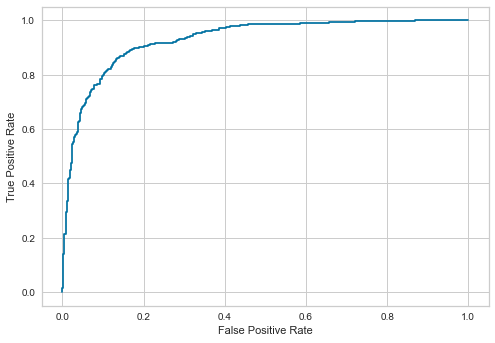

In [112]:
#plotting the ROC curve
from sklearn import metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, thr = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
y_pred_proba

array([0.22163742, 0.77644306, 0.79254454, ..., 0.54192589, 0.69806893,
       0.34499768])

In [114]:
tpr

array([0.        , 0.0015949 , 0.01594896, 0.01594896, 0.14194577,
       0.14194577, 0.1754386 , 0.1754386 , 0.21371611, 0.21371611,
       0.215311  , 0.215311  , 0.26315789, 0.26315789, 0.29346093,
       0.29346093, 0.33652313, 0.33652313, 0.3923445 , 0.3923445 ,
       0.41626794, 0.41626794, 0.42105263, 0.42105263, 0.42424242,
       0.42424242, 0.45135566, 0.45135566, 0.47527911, 0.47527911,
       0.48165869, 0.48165869, 0.54385965, 0.54385965, 0.55342903,
       0.55342903, 0.56937799, 0.56937799, 0.57256778, 0.57256778,
       0.57735247, 0.57735247, 0.58054226, 0.58054226, 0.58373206,
       0.58373206, 0.59011164, 0.59011164, 0.61403509, 0.61403509,
       0.62519936, 0.62519936, 0.62838915, 0.62838915, 0.6539075 ,
       0.6539075 , 0.65869219, 0.65869219, 0.67304625, 0.67304625,
       0.67942584, 0.67942584, 0.68102073, 0.68102073, 0.68421053,
       0.68421053, 0.68580542, 0.68580542, 0.68899522, 0.68899522,
       0.6953748 , 0.6953748 , 0.70972887, 0.70972887, 0.71132

In [115]:
g_mean_opt = []
for fp, tp, th in zip(fpr[1:], tpr[1:], thr[1:]):
    g_mean = np.sqrt(tp*(1-fp))
    g_mean_opt.append((th, g_mean))

In [116]:
g_mean_opt = pd.DataFrame(g_mean_opt, columns=["threshold", "gmean"])

In [117]:
g_mean_opt

,threshold,gmean
0,0.998973,0.039936
1,0.993281,0.126289
2,0.992618,0.126186
3,0.947190,0.376448
4,0.946571,0.376140
...,...,...
278,0.177999,0.401886
279,0.176973,0.402208
280,0.167288,0.363811
281,0.165090,0.364101


Text(0, 0.5, 'gmean')

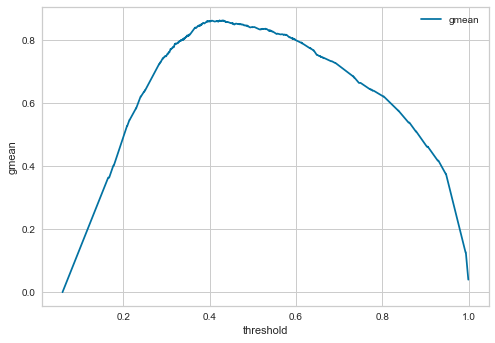

In [118]:
g_mean_opt.plot(x='threshold', y='gmean')
plt.xlabel("threshold")
plt.ylabel("gmean")

In [119]:
best_threshold = g_mean_opt.loc[g_mean_opt["gmean"].argmax(), 'threshold']

In [120]:
best_threshold

0.4300823505664014

In [121]:
y_pred_proba

array([0.22163742, 0.77644306, 0.79254454, ..., 0.54192589, 0.69806893,
       0.34499768])

In [122]:
y_pred_proba > best_threshold

array([False,  True,  True, ...,  True,  True, False])

In [123]:
y_pred = y_pred_proba > best_threshold

In [124]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.9301926144031408

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
import seaborn as sns
sns.set(font_scale=2)

<AxesSubplot:>

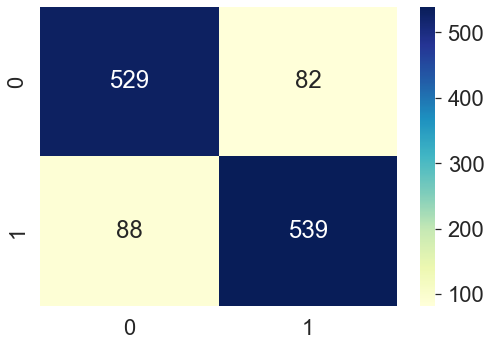

In [127]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu", annot=True, fmt="d")

# Binary Random Forest

In [128]:
#Now trying with random forest
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

rf = RandomForestClassifier()
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [129]:
rf

RandomForestClassifier()

In [130]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(80, 90, num = 11)]  
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [800, 822, 844, 866, 888, 911, 933, 955, 977, 1000]}


In [131]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, 
                               verbose=3, random_state=42, n_jobs = -1, scoring='roc_auc')
%time rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

CPU times: user 37.4 s, sys: 269 ms, total: 37.7 s
Wall time: 5min 18s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 81, 82, 83, 84, 85,
                                                      86, 87, 88, 89, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [800, 822, 844, 866,
                                                         888, 911, 933, 955,
                                                         977, 1000]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [132]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                       n_estimators=955)

In [133]:
rf_random.best_params_

{'n_estimators': 955,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [134]:
y_pred = best_random.predict(X_test)

In [135]:
y_pred[:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [136]:
y_test[:10]

5641     0
19884    1
25792    1
22700    1
15908    1
17277    0
8695     1
17760    0
16784    0
14533    0
Name: java_boolean, dtype: int64

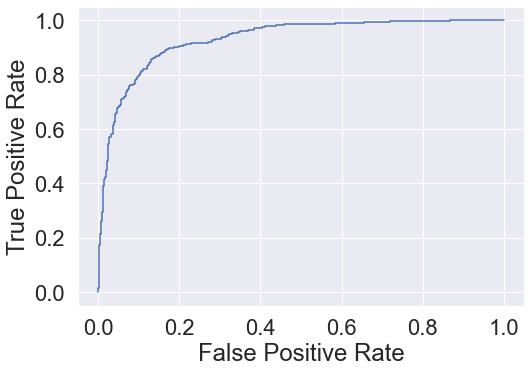

In [137]:
# Random Forest ROC Curve

y_pred_proba = best_random.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, thr_rf = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [138]:
#AUC score rf
metrics.roc_auc_score(y_test, y_pred_proba) # y_pred_proba_rf car score

0.9139839257420445

In [139]:
#Calculating g_mean for random forest
g_mean_rf = []
for tp, fp, th in zip(fpr_rf[1:], tpr_rf[1:], thr_rf[1:]):
    g_mean = np.sqrt(tp*(1-fp))
    g_mean_rf.append((th, g_mean))

Text(0, 0.5, 'gmean_rf')

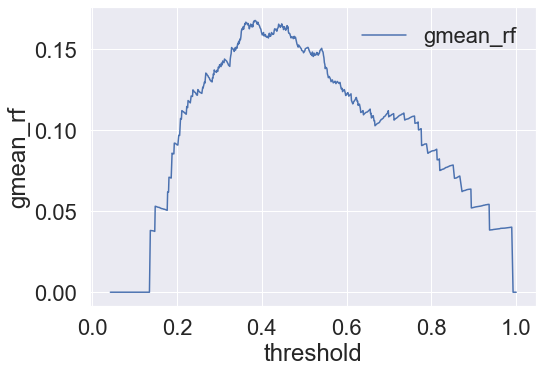

In [140]:
g_mean_rf = pd.DataFrame(g_mean_rf, columns=["threshold", "gmean_rf"])
g_mean_rf.plot(x='threshold', y='gmean_rf')
plt.xlabel("threshold")
plt.ylabel("gmean_rf")

In [141]:
best_rf_threshold = g_mean_rf.loc[g_mean_rf["gmean_rf"].argmax(), 'threshold']

In [142]:
g_mean_rf.loc[g_mean_rf["gmean_rf"].argmax()]

threshold    0.384293
gmean_rf     0.167879
Name: 320, dtype: float64

In [143]:
best_rf_threshold

0.3842931937172775

In [144]:
y_pred_rf = y_pred > best_rf_threshold

In [145]:
y_pred_rf

array([False,  True,  True, ...,  True,  True, False])

<AxesSubplot:>

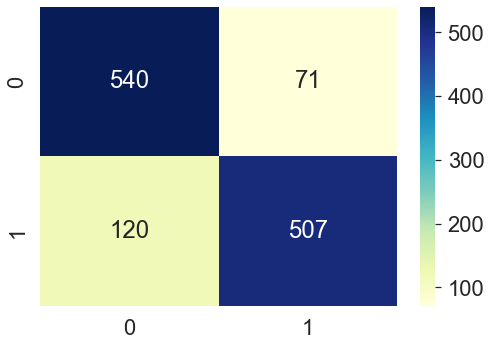

In [146]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), cmap="YlGnBu", annot=True, fmt="d")

# Multi class Random Forest

In [147]:
# prendre 7 classes et rebalancer le dataset
tags.value_counts()[:7]

python        3129
java          3094
javascript    2739
c#            2673
ios           2410
android       2015
c++           1852
dtype: int64

In [148]:
tags_dataframe

,0,1,2,3,4
0,r,ggplot2,boxplot,continuous,r-factor
1,linux,unix,process,path,environment
2,c#,windows,usb,monitoring,usb-flash-drive
3,c++,unit-testing,testing,visual-studio-2008,frameworks
4,c#,asp.net,.net,path,mappath
...,...,...,...,...,...
27583,linux,centos,vagrant,virtualbox,redhat
27584,python,macos,terminal,atom-editor,macos-monterey
27585,c++,pointers,language-lawyer,void-pointers,pointer-conversion
27586,assembly,optimization,x86-64,cpu-architecture,simd


In [149]:
classes_to_keep = tags.value_counts()[:7].index

In [150]:
classes_to_keep

Index(['python', 'java', 'javascript', 'c#', 'ios', 'android', 'c++'], dtype='object')

In [151]:
tags_dataframe_top7 = tags_dataframe[tags_dataframe[tags_dataframe.isin(classes_to_keep).sum(axis=1) == 1].isin(classes_to_keep)].dropna(how='all')

In [152]:
tags_dataframe_top7

,0,1,2,3,4
2,c#,NaN,NaN,NaN,NaN
3,c++,NaN,NaN,NaN,NaN
4,c#,NaN,NaN,NaN,NaN
5,javascript,NaN,NaN,NaN,NaN
6,javascript,NaN,NaN,NaN,NaN
...,...,...,...,...,...
27581,javascript,NaN,NaN,NaN,NaN
27582,python,NaN,NaN,NaN,NaN
27584,python,NaN,NaN,NaN,NaN
27585,c++,NaN,NaN,NaN,NaN


In [153]:
target = tags_dataframe_top7.fillna("").sum(axis=1)

In [154]:
target.value_counts()

python        3000
javascript    2553
c#            2530
java          2499
ios           2272
c++           1708
android       1421
dtype: int64

In [156]:
x_reduced_top7 = x_reduced[target.index, :]

In [157]:
x_reduced_top7.shape

(15983, 100)

In [158]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [159]:
mlb_target = MultiLabelBinarizer()  

In [160]:
target_encoded_top7 = mlb_target.fit_transform(target.values.reshape(-1, 1))

In [161]:
joblib.dump(mlb_target, "nlp_stackoverflow/mlb_target.pkl")

['nlp_stackoverflow/mlb_target.pkl']

In [162]:
pd.DataFrame(target_encoded_top7, columns=mlb_target.classes_, index=target.index)

,android,c#,c++,ios,java,javascript,python
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
27581,0,0,0,0,0,1,0
27582,0,0,0,0,0,0,1
27584,0,0,0,0,0,0,1
27585,0,0,1,0,0,0,0


In [163]:
target

2                c#
3               c++
4                c#
5        javascript
6        javascript
            ...    
27581    javascript
27582        python
27584        python
27585           c++
27587        python
Length: 15983, dtype: object

In [164]:
x_reduced_top7

array([[ 1.22856761e-01, -4.72464834e-02, -2.40332583e-02, ...,
         2.56172811e-02, -2.67260788e-02, -3.85140746e-03],
       [ 1.00971373e-01, -3.63769275e-02,  2.13771987e-02, ...,
         3.28684217e-02, -2.72347125e-02,  2.78076473e-02],
       [ 1.13974885e-01, -1.09202755e-01,  7.55944008e-02, ...,
         3.18017503e-02, -3.30573433e-03,  4.49113591e-02],
       ...,
       [ 1.56357335e-01, -7.18315931e-02,  9.07734020e-02, ...,
         4.43835798e-03, -2.56801978e-02, -1.25647664e-04],
       [ 1.30899267e-01,  4.96365149e-02, -1.14093312e-02, ...,
         2.99232403e-03, -4.22809349e-02, -5.74052784e-02],
       [ 8.03956918e-02,  5.52311789e-02,  3.24145996e-02, ...,
        -3.69394609e-02,  1.72109505e-02,  9.31118369e-03]])

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reduced_top7, target_encoded_top7, test_size=0.2, random_state=42)

In [166]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [167]:
x_top7 = X[target.index, :]

In [168]:
# Unsupervised LDA
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7)
topics = lda.fit_transform(x_top7)

In [169]:
pd.Series(topics.argmax(axis=1)).value_counts()

3    15269
4      158
1      124
0      116
2      110
6      104
5      102
dtype: int64

In [170]:
max_topic = topics.argmax(axis=1)

In [171]:
cluster_vs_target = pd.DataFrame()
cluster_vs_target["cluster"] = max_topic
cluster_vs_target["target"] = target.values

In [172]:
cluster_vs_target = cluster_vs_target.reset_index()

In [173]:
r = cluster_vs_target.groupby(["cluster", "target"]).count()

In [174]:
r

index
cluster target           
0       android        22
        c#             12
        c++             7
        ios            10
        java           24
        javascript     13
        python         28
1       android        19
        c#             11
        c++            13
        ios            22
        java           18
        javascript     18
        python         23
2       android        21
        c#             11
        c++             8
        ios            14
        java           10
        javascript     16
        python         30
3       android      1294
        c#           2440
        c++          1649
        ios          2202
        java         2386
        javascript   2461
        python       2837
4       android        44
        c#             23
        c++             8
        ios            13
        java           23
        javascript     15
        python         32
5       android        11
        c#             19
        c++            10
        ios             3
        java           17
        javascript     16
        python         26
6       android        10
        c#             14
        c++            13
        ios             8
        java           21
        javascript     14
        python         24

In [175]:
rf = RandomForestClassifier()

In [176]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(rf)

In [177]:
X_train.shape

(12786, 100)

In [178]:
y_train.shape

(12786, 7)

In [179]:
# Number of trees in random forest
n_estimators = [500]  ##[int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
# Number of features to consider at every split
max_features = ['auto'] #['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 10)]  
bootstrap = [True]  #[True, False]
random_grid = {'estimator__n_estimators': n_estimators,
               'estimator__max_features': max_features,
               'estimator__max_depth': max_depth,
               'estimator__bootstrap': bootstrap}
pprint(random_grid)

{'estimator__bootstrap': [True],
 'estimator__max_depth': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100],
 'estimator__max_features': ['auto'],
 'estimator__n_estimators': [500]}


In [180]:
rf_random_mc = RandomizedSearchCV(estimator = ovr, param_distributions = random_grid, n_iter = 15, cv = 3, 
                               verbose=8, random_state=42, n_jobs = -1, scoring='roc_auc')
%time rf_random_mc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

[CV 3/3] END bootstrap=False, max_depth=82, max_features=auto, n_estimators=911;, score=0.913 total time=  42.0s
[CV 1/3] END bootstrap=False, max_depth=85, max_features=auto, n_estimators=955;, score=0.910 total time=  44.8s
[CV 2/3] END bootstrap=True, max_depth=84, max_features=auto, n_estimators=844;, score=0.901 total time=  24.8s
[CV 1/3] END bootstrap=False, max_depth=80, max_features=auto, n_estimators=955;, score=0.912 total time=  45.9s
[CV 3/3] END bootstrap=True, max_depth=90, max_features=sqrt, n_estimators=977;, score=0.912 total time=  29.6s
[CV 1/3] END bootstrap=True, max_depth=83, max_features=sqrt, n_estimators=933;, score=0.908 total time=  28.4s
[CV 1/3] END bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=888;, score=0.910 total time=  47.2s
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=50, estimator__max_features=auto, estimator__n_estimators=500;, score=0.936 total time= 5.8min
[CV 1/3] END estimator__bootstrap=True, estimator__max_d

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

CPU times: user 4min 17s, sys: 986 ms, total: 4min 18s
Wall time: 27min 30s


RandomizedSearchCV(cv=3,
                   estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'estimator__bootstrap': [True],
                                        'estimator__max_depth': [50, 55, 61, 66,
                                                                 72, 77, 83, 88,
                                                                 94, 100],
                                        'estimator__max_features': ['auto'],
                                        'estimator__n_estimators': [500]},
                   random_state=42, scoring='roc_auc', verbose=8)

In [181]:
rf_random_mc.best_params_ 

{'estimator__n_estimators': 500,
 'estimator__max_features': 'auto',
 'estimator__max_depth': 100,
 'estimator__bootstrap': True}

In [211]:
best_rf_mc = rf_random_mc.best_estimator_
best_rf_mc

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=100,
                                                     max_features='auto',
                                                     n_estimators=500))

In [183]:
joblib.dump(best_rf_mc, "nlp_stackoverflow/model.pkl")

['nlp_stackoverflow/model.pkl']

In [184]:
y_pred_proba = best_rf_mc.predict_proba(X_test)

In [185]:
y_pred_proba.shape

(3197, 7)

In [186]:
y_pred_proba

array([[0.014, 0.01 , 0.024, ..., 0.058, 0.028, 0.912],
       [0.03 , 0.036, 0.018, ..., 0.13 , 0.07 , 0.662],
       [0.144, 0.366, 0.086, ..., 0.278, 0.05 , 0.282],
       ...,
       [0.046, 0.484, 0.306, ..., 0.032, 0.052, 0.048],
       [0.006, 0.132, 0.016, ..., 0.05 , 0.844, 0.054],
       [0.01 , 0.126, 0.038, ..., 0.49 , 0.046, 0.1  ]])

In [187]:
pd.Series(y_pred_proba.reshape(-1)).value_counts()

0.026    379
0.024    378
0.034    365
0.030    356
0.040    353
        ... 
0.688      2
0.952      2
0.714      1
0.996      1
0.984      1
Length: 500, dtype: int64

In [188]:
y_pred_labels = [mlb_target.classes_[item] for item in y_pred_proba.argmax(axis=1)]

In [189]:
y_pred_labels

['python',
 'python',
 'c#',
 'ios',
 'python',
 'javascript',
 'ios',
 'java',
 'javascript',
 'javascript',
 'javascript',
 'c#',
 'javascript',
 'python',
 'javascript',
 'c++',
 'python',
 'ios',
 'c++',
 'python',
 'c#',
 'c#',
 'javascript',
 'python',
 'c#',
 'python',
 'java',
 'c#',
 'c#',
 'java',
 'android',
 'python',
 'python',
 'python',
 'javascript',
 'c#',
 'python',
 'python',
 'ios',
 'javascript',
 'java',
 'ios',
 'c++',
 'c#',
 'javascript',
 'c#',
 'python',
 'java',
 'python',
 'c#',
 'javascript',
 'ios',
 'python',
 'c++',
 'python',
 'ios',
 'python',
 'ios',
 'python',
 'c#',
 'ios',
 'python',
 'ios',
 'python',
 'ios',
 'javascript',
 'c++',
 'android',
 'javascript',
 'javascript',
 'c++',
 'android',
 'ios',
 'python',
 'android',
 'java',
 'c++',
 'python',
 'java',
 'c#',
 'ios',
 'javascript',
 'c#',
 'ios',
 'python',
 'python',
 'javascript',
 'ios',
 'java',
 'javascript',
 'android',
 'c#',
 'javascript',
 'c++',
 'java',
 'c#',
 'c#',
 'c#',
 'ja

In [190]:
y_pred_proba.argmax(axis=1)

array([6, 6, 1, ..., 1, 5, 4])

In [191]:
y_test_labels = [item[0] for item in mlb_target.inverse_transform(y_test)]

In [192]:
y_test_labels

['python',
 'python',
 'c#',
 'android',
 'python',
 'javascript',
 'ios',
 'java',
 'javascript',
 'javascript',
 'javascript',
 'ios',
 'javascript',
 'python',
 'java',
 'c++',
 'python',
 'ios',
 'python',
 'python',
 'c#',
 'c#',
 'javascript',
 'python',
 'c#',
 'python',
 'java',
 'c#',
 'c#',
 'java',
 'android',
 'python',
 'python',
 'python',
 'javascript',
 'c#',
 'python',
 'python',
 'ios',
 'javascript',
 'android',
 'ios',
 'c++',
 'c#',
 'ios',
 'c#',
 'python',
 'java',
 'python',
 'c#',
 'ios',
 'ios',
 'python',
 'java',
 'python',
 'c#',
 'c#',
 'ios',
 'python',
 'c#',
 'ios',
 'python',
 'javascript',
 'python',
 'ios',
 'javascript',
 'c++',
 'android',
 'javascript',
 'javascript',
 'c++',
 'android',
 'ios',
 'python',
 'android',
 'java',
 'c++',
 'c++',
 'java',
 'c#',
 'ios',
 'c++',
 'c#',
 'android',
 'python',
 'python',
 'javascript',
 'ios',
 'android',
 'javascript',
 'android',
 'c#',
 'ios',
 'c++',
 'java',
 'c#',
 'c#',
 'c#',
 'c++',
 'java',
 'c

In [193]:
from sklearn.metrics import f1_score

print(f1_score(y_test_labels, y_pred_labels, average='macro'))
print(f1_score(y_test_labels, y_pred_labels, average='micro'))
print(f1_score(y_test_labels, y_pred_labels, average='weighted'))

0.7966824700814582
0.7960588051298092
0.7962927051838192


In [194]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_labels, y_pred_labels)

0.7960588051298092

In [195]:
m = confusion_matrix(y_test_labels, y_pred_labels)

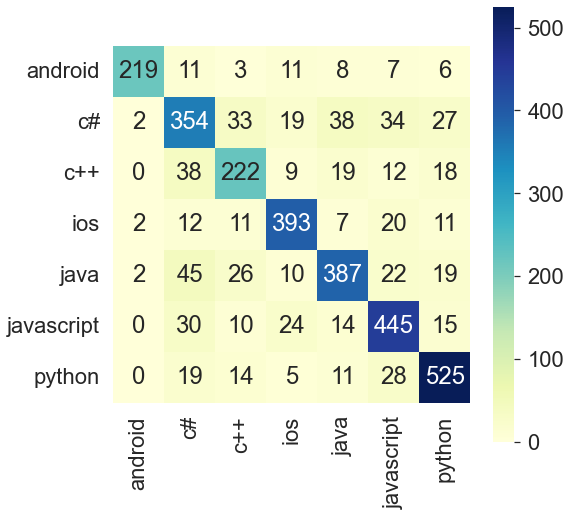

In [196]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 8))
_ = sns.heatmap(
    m, cmap="YlGnBu", annot=True, fmt="d", 
    xticklabels=mlb_target.classes_, yticklabels=mlb_target.classes_,
    square=True
)

In [197]:
def preprocess_single_document(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    to_lower = punctuationfree.lower()
    tokenizer = nltk.word_tokenize(to_lower)
    remove_sw = [i for i in tokenizer if i not in stopwords]
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in remove_sw]
    x_str = " ".join(lemm_text)
    X = vectorizer.transform([x_str])
    x_reduced = svd.transform(X)
    return x_reduced

In [198]:
def get_tag(text):
    x = preprocess_single_document(text)
    pred_proba = best_rf_mc.predict_proba(x) 
    tag = [mlb_target.classes_[item] for item in pred_proba.argmax(axis=1)]
    return tag

In [199]:
test_string = """How can I merge two Python dictionaries in a single expression?
For dictionaries x and y, their shallowly-merged dictionary z takes values from y, replacing those from x.

In Python 3.9.0 or greater (released 17 October 2020, PEP-584, discussed here):

z = x | y
In Python 3.5 or greater:

z = \{**x, **y\}
In Python 2, (or 3.4 or lower) write a function:

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z
and now:

z = merge_two_dicts(x, y)"""

In [200]:
test_string.encode("unicode_escape")

b'How can I merge two Python dictionaries in a single expression?\\nFor dictionaries x and y, their shallowly-merged dictionary z takes values from y, replacing those from x.\\n\\nIn Python 3.9.0 or greater (released 17 October 2020, PEP-584, discussed here):\\n\\nz = x | y\\nIn Python 3.5 or greater:\\n\\nz = \\\\{**x, **y\\\\}\\nIn Python 2, (or 3.4 or lower) write a function:\\n\\ndef merge_two_dicts(x, y):\\n    z = x.copy()   # start with keys and values of x\\n    z.update(y)    # modifies z with keys and values of y\\n    return z\\nand now:\\n\\nz = merge_two_dicts(x, y)'

In [201]:
test_string_2 = """I've looked everywhere and can't find a solid answer. According to the documentation, Java throws a java.lang.StackOverflowError error under the following circumstance:

Thrown when a stack overflow occurs because an application recurses too deeply.

But this raises two questions:

Aren't there other ways for a stack overflow to occur, not only through recursion?
Does the StackOverflowError happen before the JVM actually overflows the stack or after?
To elaborate on the second question:

When Java throws the StackOverflowError, can you safely assume that the stack did not write into the heap? If you shrink the size of the stack or heap in a try/catch on a function that throws a stack overflow, can you continue working? Is this documented anywhere?

Answers I am not looking for:

A StackOverflow happens because of bad recursion.
A StackOverflow happens when the heap meets the stack."""

In [202]:
test_string_2.encode("unicode_escape").decode('utf-8')

"I've looked everywhere and can't find a solid answer. According to the documentation, Java throws a java.lang.StackOverflowError error under the following circumstance:\\n\\nThrown when a stack overflow occurs because an application recurses too deeply.\\n\\nBut this raises two questions:\\n\\nAren't there other ways for a stack overflow to occur, not only through recursion?\\nDoes the StackOverflowError happen before the JVM actually overflows the stack or after?\\nTo elaborate on the second question:\\n\\nWhen Java throws the StackOverflowError, can you safely assume that the stack did not write into the heap? If you shrink the size of the stack or heap in a try/catch on a function that throws a stack overflow, can you continue working? Is this documented anywhere?\\n\\nAnswers I am not looking for:\\n\\nA StackOverflow happens because of bad recursion.\\nA StackOverflow happens when the heap meets the stack."

In [233]:
import json

In [204]:
json.dumps({"text": test_string_2})

'{"text": "I\'ve looked everywhere and can\'t find a solid answer. According to the documentation, Java throws a java.lang.StackOverflowError error under the following circumstance:\\n\\nThrown when a stack overflow occurs because an application recurses too deeply.\\n\\nBut this raises two questions:\\n\\nAren\'t there other ways for a stack overflow to occur, not only through recursion?\\nDoes the StackOverflowError happen before the JVM actually overflows the stack or after?\\nTo elaborate on the second question:\\n\\nWhen Java throws the StackOverflowError, can you safely assume that the stack did not write into the heap? If you shrink the size of the stack or heap in a try/catch on a function that throws a stack overflow, can you continue working? Is this documented anywhere?\\n\\nAnswers I am not looking for:\\n\\nA StackOverflow happens because of bad recursion.\\nA StackOverflow happens when the heap meets the stack."}'

In [205]:
preprocess_single_document(test_string).shape

(1, 100)

In [206]:
get_tag(test_string)

['python']

In [207]:
get_tag(test_string_2)

['java']

[CV 1/3] END bootstrap=False, max_depth=82, max_features=auto, n_estimators=911;, score=0.910 total time=  42.1s
[CV 2/3] END bootstrap=False, max_depth=85, max_features=auto, n_estimators=955;, score=0.900 total time=  44.3s
[CV 1/3] END bootstrap=True, max_depth=84, max_features=auto, n_estimators=844;, score=0.909 total time=  25.0s
[CV 3/3] END bootstrap=False, max_depth=89, max_features=auto, n_estimators=911;, score=0.913 total time=  43.6s
[CV 3/3] END bootstrap=True, max_depth=83, max_features=sqrt, n_estimators=911;, score=0.913 total time=  27.3s
[CV 1/3] END bootstrap=False, max_depth=86, max_features=auto, n_estimators=844;, score=0.910 total time=  41.0s
[CV 3/3] END bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=888;, score=0.912 total time=  45.5s
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=55, estimator__max_features=auto, estimator__n_estimators=500;, score=0.937 total time= 5.8min
[CV 3/3] END estimator__bootstrap=True, estimator__max_

# Word2Vec

In [243]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df_resampled['Body_bow'] = df_resampled['Body'].apply(lambda x : transform_bow_fct(x))
df_resampled['Body_lem'] = df_resampled['Body'].apply(lambda x : transform_bow_lem_fct(x))
df_resampled['Body_d1'] = df_resampled['Body'].apply(lambda x : transform_dl_fct(x))

In [241]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


In [261]:
df_resampled['java_boolean']

26519    1
11183    0
21482    1
13237    1
759      1
        ..
20758    0
2852     0
4357     1
21515    0
13971    0
Name: java_boolean, Length: 6188, dtype: int64

In [263]:
l_cat = list(set(df_resampled['java_boolean']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_resampled.iloc[i]['java_boolean'])) for i in range(len(df_resampled))]

catégories :  [0, 1]


In [246]:
from nltk.tokenize import sent_tokenize, word_tokenize

df_resampled['length_bow'] = df_resampled['Body_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df_resampled['length_bow'].max())
df_resampled['length_dl'] = df_resampled['Body_d1'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df_resampled['length_dl'].max())


max length bow :  1830
max length dl :  5469


In [266]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tags par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tags par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [255]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Body_lem'
cv_fit = cvect.fit(df_resampled[feat])
ctf_fit = ctf.fit(df_resampled[feat])

cv_transform = cvect.transform(df_resampled[feat])  
ctf_transform = ctf.transform(df_resampled[feat])  

In [247]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [248]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df_resampled['Body_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [249]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 35304
Word2Vec trained


In [250]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 35305


In [251]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (35305, 300)


In [252]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           10591500  
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 10,591,500
Trainable params: 10,591,500
Non-trainable params: 0
_________________________________________________________________


2022-07-14 13:23:49.938594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [264]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape
ARI, X_tsne, labels = ARI_fct(embeddings)

194/194 [==============================] - 0s 1ms/step
ARI :  -0.0001 time :  59.0


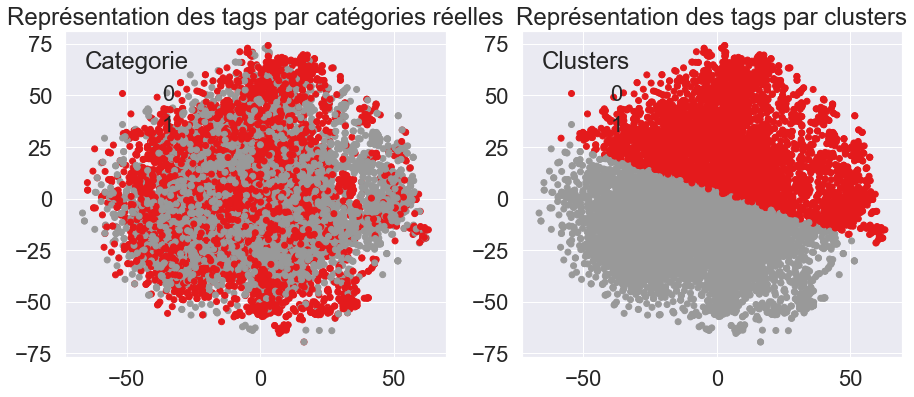

ARI :  -0.0001


In [267]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [270]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [271]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [272]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_resampled['Body_d1'].to_list()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

In [273]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

1/1 [==============================] - 1s 721ms/step


1/1 [==============================] - 1s 619ms/step


1/1 [==============================] - 1s 585ms/step


1/1 [==============================] - 1s 537ms/step


1/1 [==============================] - 1s 536ms/step
temps traitement :  704.0


In [274]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ValueError: Found input variables with inconsistent numbers of samples: [6188, 6180]

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_resampled['Body_d1'].to_list()

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
sentences = df_resampled['Body_d1'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE

In [275]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [277]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [278]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [279]:
batch_size = 10
sentences = df_resampled['Body_d1'].to_list()

In [280]:
features_USE = feature_USE_fct(sentences, batch_size)

In [281]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ValueError: Found input variables with inconsistent numbers of samples: [6188, 6180]

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)